# PBMC Genome Tracks

In [1]:
!date

Fri Sep  6 13:53:21 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks


In [3]:
import os
import subprocess
from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [4]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
# import sys
# !{sys.executable} -m pip install pybiomart

from pybiomart import Dataset

In [6]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [7]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [8]:
adata_spl = sc.read_h5ad(input_dir+'adata_spl_v2.h5ad')

adata_spl.obs_names = adata_spl.obs_names.str.replace(pat='-0-22',repl='-0').str.replace(pat='-1-23',repl='-1')


adata_exp = sc.read_h5ad(input_dir+'gene_expression_v2.h5ad')

adata_spl = adata_spl[adata_spl.obs_names.isin(adata_exp.obs_names)]

adata_spl.obs = adata_exp.obs.copy()
adata_spl.obsm['X_umap'] = adata_exp.obsm['X_umap']

In [9]:
adata_spl.uns

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

In [10]:
# fix color for 'Memory CD8 T cells'
adata_exp.uns['celltype_colors'][6] = '#F8D90B'

In [11]:
adata_gene = adata_exp.copy()

In [12]:
adata_gene.obs.batch

barcode_index
AAACCTGAGATATGCA-0    22
AAACCTGAGCTGATAA-0    22
AAACCTGAGGTCGGAT-0    22
AAACCTGAGTACGTTC-0    22
AAACCTGAGTCAAGCG-0    22
                      ..
TTTGTCAGTGTTGAGG-1    23
TTTGTCAGTTGGACCC-1    23
TTTGTCAGTTGTACAC-1    23
TTTGTCATCCGGGTGT-1    23
TTTGTCATCTACTATC-1    23
Name: batch, Length: 19087, dtype: category
Categories (2, object): ['22', '23']

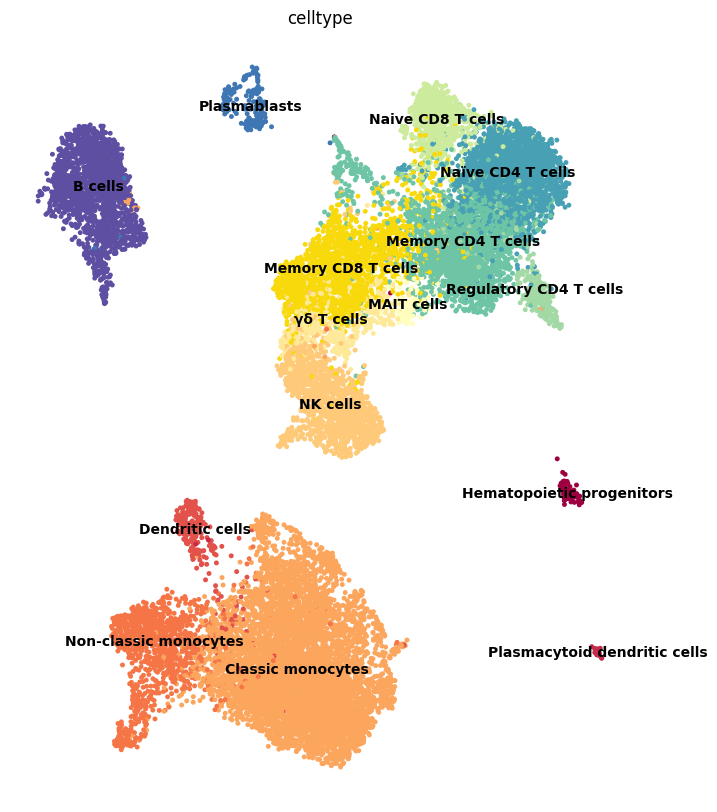

In [13]:
plt.rcParams['figure.figsize'] = 8,10
sc.pl.umap(adata_gene,
          color=['celltype'],
           ncols=2,
           size=50,
           frameon=False,
           legend_loc='on data',
           save='_PBMC_celltype'
          )

In [14]:
# diff_spl_introns = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_introns_SLR_ct2',index_col=0)
# diff_spl_intron_groups = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_intron_groups_SLR_ct2',index_col=0)


# diff_spl_introns = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_introns_SLR',index_col=0)
# diff_spl_intron_groups = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_intron_groups_SLR',index_col=0)


diff_spl_introns = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_introns_SLR_TCELL',index_col=0)
diff_spl_intron_groups = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_intron_groups_SLR_TCELL',index_col=0)

In [15]:
diff_spl_intron_groups[diff_spl_intron_groups['gene_name'] == 'PTPRC'].name.unique()

array(['PTPRC_chr1_198692374_+', 'PTPRC_chr1_198703297_+',
       'PTPRC_chr1_198639138_+', 'PTPRC_chr1_198639342_+',
       'PTPRC_chr1_198708262_+', 'PTPRC_chr1_198741868_+',
       'PTPRC_chr1_198731616_+', 'PTPRC_chr1_198742027_+'], dtype=object)

In [16]:
'PTPRC_chr1_198692374_+'

'PTPRC_chr1_198692374_+'

In [17]:
[i for i in adata_spl.var_names if i.startswith('PTPRC_chr1:198692374')]

['PTPRC_chr1:198692374-198694017',
 'PTPRC_chr1:198692374-198696711',
 'PTPRC_chr1:198692374-198699563',
 'PTPRC_chr1:198692374-198702386',
 'PTPRC_chr1:198692374-198703297']

In [18]:
groups_test = [i for i in adata_gene.obs.ct3.unique() if (i.startswith('T4')) | (i.startswith('T8'))]

groups_test = [i for i in groups_test if 'Pool' not in i]

In [19]:
adata_spl[adata_spl.obs.ct3.isin(groups_test)]

View of AnnData object with n_obs × n_vars = 7687 × 81480
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal', 'celltype'
    var: 'chromosome',

In [20]:
PTPRC  = sc.get.obs_df(
    adata_spl[adata_spl.obs.ct3.isin(groups_test)],
    layer = 'PSI_raw',   
    keys = ['celltype'] + [i for i in adata_spl.var_names if i.startswith('PTPRC_chr1:198692374')]
)

In [21]:
PTPRC

,celltype,PTPRC_chr1:198692374-198694017,PTPRC_chr1:198692374-198696711,PTPRC_chr1:198692374-198699563,PTPRC_chr1:198692374-198702386,PTPRC_chr1:198692374-198703297
barcode_index,,,,,,
AAACCTGAGGTCGGAT-0,Memory CD4 T cells,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTACGTTC-0,Memory CD4 T cells,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTCGCCGT-0,Memory CD4 T cells,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTTGTAGA-0,Memory CD4 T cells,0.0,0.0,1.0,0.0,0.0
AAACCTGCAACAACCT-0,Memory CD4 T cells,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
TTTGTCACAAACGTGG-1,Memory CD8 T cells,0.0,1.0,0.0,0.0,0.0
TTTGTCACACCTGGTG-1,Naïve CD4 T cells,NaN,NaN,NaN,NaN,NaN
TTTGTCAGTCTTGTCC-1,Memory CD8 T cells,NaN,NaN,NaN,NaN,NaN


In [22]:
PTPRC_ = pd.DataFrame(
    PTPRC.groupby('celltype')['PTPRC_chr1:198692374-198696711',
                  #       'PTPRC_chr1:198692374-198699563',
                         'PTPRC_chr1:198692374-198703297'].mean()).T

/scratch/derek/ipykernel_2889187/3212200587.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PTPRC.groupby('celltype')['PTPRC_chr1:198692374-198696711',


In [23]:
PTPRC_

celltype,Naïve CD4 T cells,Memory CD4 T cells,Regulatory CD4 T cells,Naive CD8 T cells,Memory CD8 T cells,MAIT cells
PTPRC_chr1:198692374-198696711,0.372829,0.085818,0.065826,0.611413,0.211788,0.065789
PTPRC_chr1:198692374-198703297,0.120728,0.585705,0.567927,0.046196,0.259074,0.225877


In [24]:
PTPRC_.melt(ignore_index=False).reset_index()

,index,celltype,value
0,PTPRC_chr1:198692374-198696711,Naïve CD4 T cells,0.372829
1,PTPRC_chr1:198692374-198703297,Naïve CD4 T cells,0.120728
2,PTPRC_chr1:198692374-198696711,Memory CD4 T cells,0.085818
3,PTPRC_chr1:198692374-198703297,Memory CD4 T cells,0.585705
4,PTPRC_chr1:198692374-198696711,Regulatory CD4 T cells,0.065826
5,PTPRC_chr1:198692374-198703297,Regulatory CD4 T cells,0.567927
6,PTPRC_chr1:198692374-198696711,Naive CD8 T cells,0.611413
7,PTPRC_chr1:198692374-198703297,Naive CD8 T cells,0.046196
8,PTPRC_chr1:198692374-198696711,Memory CD8 T cells,0.211788
9,PTPRC_chr1:198692374-198703297,Memory CD8 T cells,0.259074


In [25]:
PTPRC__ = PTPRC_.melt(ignore_index=False).reset_index()

In [26]:
PTPRC__[PTPRC__.celltype.isin(['Naïve CD4 T cells','Memory CD4 T cells','Naive CD8 T cells','Memory CD8 T cells'])]

,index,celltype,value
0,PTPRC_chr1:198692374-198696711,Naïve CD4 T cells,0.372829
1,PTPRC_chr1:198692374-198703297,Naïve CD4 T cells,0.120728
2,PTPRC_chr1:198692374-198696711,Memory CD4 T cells,0.085818
3,PTPRC_chr1:198692374-198703297,Memory CD4 T cells,0.585705
6,PTPRC_chr1:198692374-198696711,Naive CD8 T cells,0.611413
7,PTPRC_chr1:198692374-198703297,Naive CD8 T cells,0.046196
8,PTPRC_chr1:198692374-198696711,Memory CD8 T cells,0.211788
9,PTPRC_chr1:198692374-198703297,Memory CD8 T cells,0.259074


(0.0, 1.0)

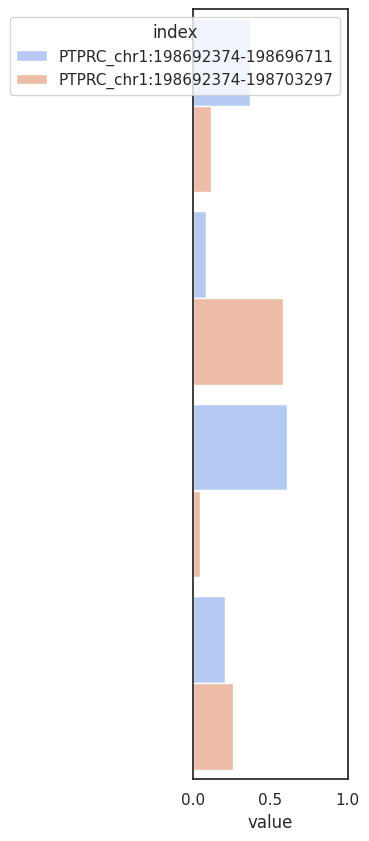

In [27]:
sns.set(font_scale=1)
sns.set_style('white')

fig, ax = plt.subplots(1, 1, figsize=(2, 10))

ax.legend([],frameon=False)


# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)

ax.set_ylabel('')


sns.barplot(data=PTPRC__[PTPRC__.celltype.isin(['Naïve CD4 T cells','Memory CD4 T cells','Naive CD8 T cells','Memory CD8 T cells'])],
            x='value',
            y='celltype',
            orient='h',
            # order=order,
            hue='index',
            palette='coolwarm',
            width=0.9,
        )



ax.set(yticklabels=[])
ax.set(ylabel=None)

ax.set_xlim(0,1)

In [27]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [27]:
sashimi_introns =diff_spl_introns[(
    diff_spl_introns.intron_group == 'PTPRC_chr1_198692374_+') & 
    (diff_spl_introns.n_cells >= 10)]



In [28]:
# replace spaces with underscores in celltypes names
sashimi_introns.test_group = sashimi_introns.test_group.str.replace(' ','_')

/scratch/derek/ipykernel_2889187/915061391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sashimi_introns.test_group = sashimi_introns.test_group.str.replace(' ','_')


In [29]:
intron_group = sashimi_introns['intron_group'].iloc[1]

In [30]:
# groups_test= adata_spl.obs.celltype.cat.categories.tolist()

# groups_test = [
#  'Classic_monocytes',
#  'Memory_CD4_T_cells',
#  'Naïve_CD4_T_cells',
#  'Memory_CD8_T_cells',
#  'B_cells',
#  'NK_cells',
#  'Non-classic_monocytes',
#  'Naive_CD8_T_cells'
# ]

groups_test = diff_spl_introns.test_group.unique().tolist()

In [31]:
sashimi_introns.iloc[[0]].intron_group_size.values[0]

5

In [32]:

link_files=[]

starts=list()
ends=list()

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        number_introns = len(sashimi_introns_) #sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
        os.makedirs(f"./sashimi_plots/{intron_group}/",exist_ok=True)
        
        f = open(f"./sashimi_plots/{intron_group}/link_{name}.txt", "w+")
        
        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )
            starts.append(sashimi_introns_.iloc[[intron]]['start'].values[0])
            ends.append(sashimi_introns_.iloc[[intron]]['end'].values[0])
            chrom = str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])
        f.close()

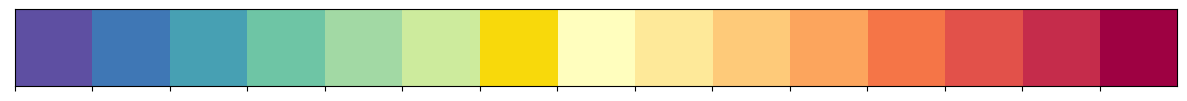

In [33]:
# col_color_dict = dict(zip(adata_gene.obs['ct3'].cat.categories.str.replace(' ','_'),adata_gene.uns['ct3_colors']))

col_color_dict = dict(zip(adata_gene.obs['celltype'].cat.categories.str.replace(' ','_'),adata_gene.uns['celltype_colors']))


#col_color_dict_filtered = {key: col_color_dict[key] for key in mean_deduped.columns.tolist()}

sns.palplot(col_color_dict.values())



In [34]:
#generate barcode/celltype file 
# temp = adata_gene[adata_gene.obs.batch == '23'].obs.copy()

# temp.celltype = temp.celltype.str.replace(' ','_')

# temp['barcode'] = temp.index.str[:-2].values

# temp[['barcode','celltype']].to_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/celltypes/celltypes_sample_2.csv',
#                                    header=None,
#                                    index=None,
#                                    sep='\t')

In [35]:
link_files

['T4_Mem',
 'T8_EM_GZMK+',
 'T4_Naive',
 'T4_Treg',
 'T8_Naive',
 'T8_TEMRA_GZMH+',
 'T8_MAIT',
 'T4_Mem_Prolif_Early',
 'T8_Mem_Prolif_Early']

In [36]:
link_files_ = [
 'Naïve_CD4_T_cells','Memory_CD4_T_cells',
 'Naive_CD8_T_cells','Memory_CD8_T_cells',
             ]

# link_files_ = link_files

# link_files_ = ['B_cells',
#                'Naïve_CD4_T_cells',
#                 'Memory_CD4_T_cells',
#                 'Naive_CD8_T_cells',   
#                 'Memory_CD8_T_cells',
#                 'NK_cells',
#                 'Classic_monocytes',
#                'Non-classic_monocytes',
# ]

In [37]:
link_files_ 

['Naïve_CD4_T_cells',
 'Memory_CD4_T_cells',
 'Naive_CD8_T_cells',
 'Memory_CD8_T_cells']

In [38]:
##write ini file

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/immune_fastqs/sample_2/past_run/merged/celltype_bams'

for name in link_files_:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/{intron_group}/link_{name}.txt
bw_file = {bw_path}/{name}.bw
height = 4
bw_color = {col_color_dict[name]}
number_of_bins = 10000
max_value = 6
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color = {col_color_dict[name]}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 5
scale_line_width = 4
show_number = True
file_type = sashimiBigWig

[spacer]
height = 1

"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
#gene_rows = 10

[spacer]
height = 1
[x-axis]
"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))

In [49]:
##write ini file
#back up paramters

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/celltypes/'

for name in link_files_:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/{intron_group}/link_{name}.txt
bw_file = {bw_path}/{name}.bw
height = 2
bw_color = {col_color_dict[name]}
number_of_bins = 1000
#max_value = 6
#scale_factor=1
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color = {col_color_dict[name]}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
scale_link_height = .5
scale_line_width = 1
show_number = True
file_type = sashimiBigWig

[spacer]
height = .1


"""

ini_file = ini_file + """
[spacer]
height = 2


[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/derek/reference/human_hg38_reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

[spacer]
height = 0.5
[x-axis]
fontsize=10


"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))

In [39]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig2'

In [40]:
# from pybiomart import Dataset

# dataset = Dataset(name='hsapiens_gene_ensembl',
#                   host='http://www.ensembl.org')

# genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
#               )

In [41]:
start = np.min(starts)-100
end = np.max(ends)+10000 

region = chrom+':'+start.astype(str)+'-'+end.astype(str)

In [42]:
region

'chr1:198692274-198713297'

In [43]:
#genes[genes['Gene name'] == 'ERGIC3']

In [44]:
%%bash -s "$region"
pyGenomeTracks \
--tracks ./sashimi_plots/sashimi.ini \
--plotWidth 20 \
--region $1 \
-o ./sashimi_plots/sashimi_CD45.png 


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|██████████| 4/4 [00:00<00:00, 14652.59it/s]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [sashimi file test]
100%|██████████| 4/4 [00:00<00:00, 15391.94it/s]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [sashimi file test]
100%|██████████| 4/4 [00:00<00:00, 21454.24it/s]
INFO:pygenometracks.tracksClass:initialize 7. [spacer]
INFO:pygenometracks.tracksClass:initialize 8. [sashimi file test]
100%|██████████| 4/4 [00:00<00:00, 25771.45it/s]
INFO:pygenometracks.tracksClass:initialize 9. [spacer]
INFO:pygenometracks.tracksClass:initialize 10. [spacer]
INFO:pygenometracks.tracksClass:initialize 11. [genes]
100%|██████████| 22/22 [00:00<00:00, 1351.87it/s]
INFO:pygenometracks.tracksClass:initialize 12. [spacer]
INFO:pygenometracks.tracksClass:initialize 13. 

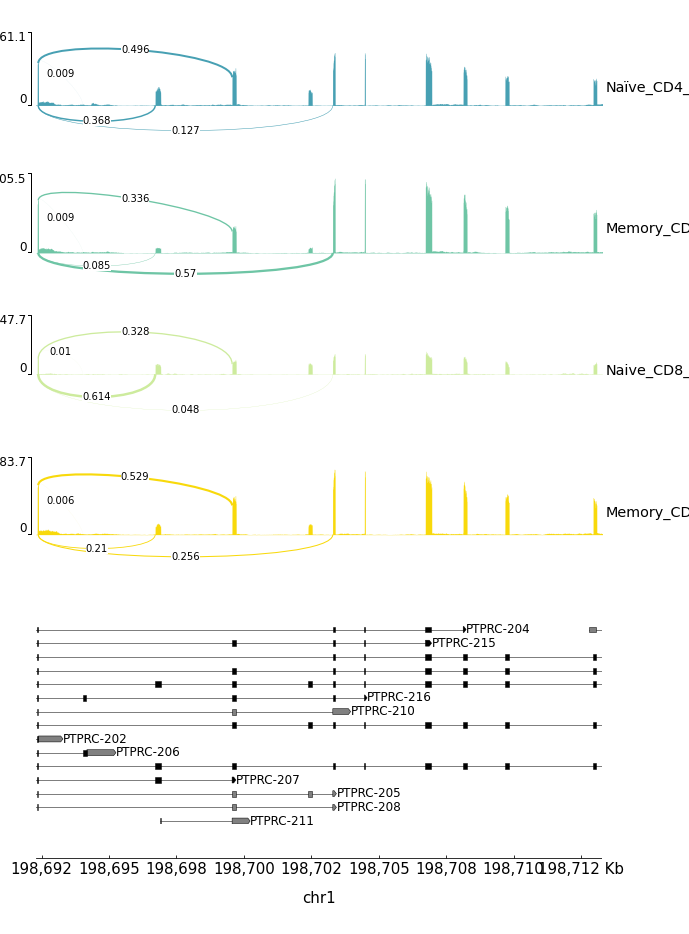

In [45]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_CD45.png',retina=False)

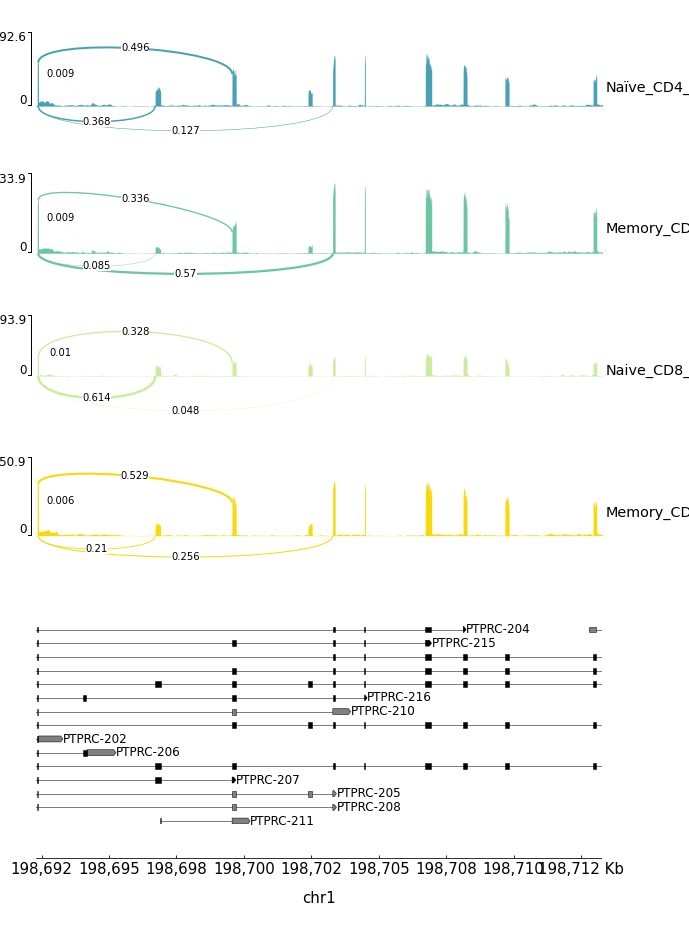

In [65]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_CD45.png',retina=False)

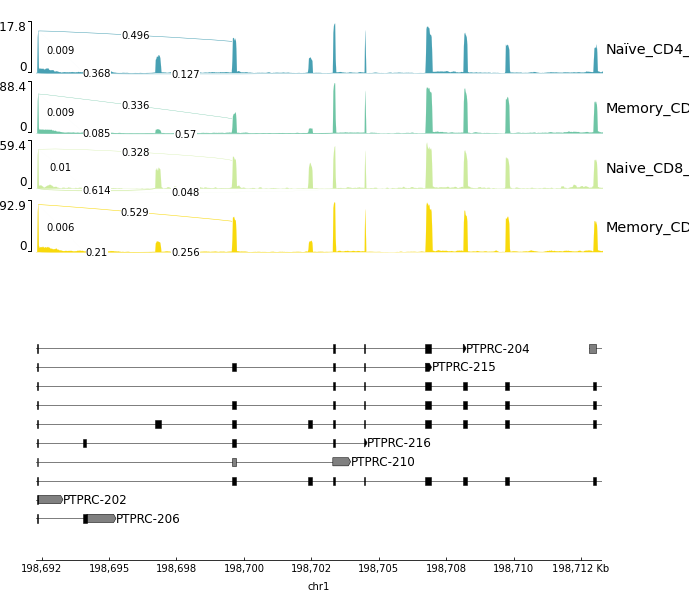

In [56]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_CD45.png',retina=False)

In [ ]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_CD45.png',retina=False)

In [ ]:
break

In [ ]:
%%bash -s "$region"
pyGenomeTracks \
--tracks ./sashimi_plots/sashimi.ini \
--plotWidth 8 \
--region $1 \
# -o ./sashimi_plots/sashimi_SE_CD45_ct2.pdf 

In [ ]:
#!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --plotWidth 15 --region 'chr1:198690000-198705000' -o ./plots/sashimi_T4_PTPRC.pdf

In [ ]:
link_files[0:2]

In [ ]:
link_files[0]

In [ ]:
sig_introns_sort = sig_diff_spl_introns.reindex(
    sig_diff_spl_introns.abs_delta_psi.abs().sort_values(ascending=False).index)#.head(50)


sig_introns_sort = sig_introns_sort[sig_introns_sort.event_type == 'SE']

In [ ]:


for gene in sig_introns_sort[200:300]['gene_name']:
    print(gene)
    
    sashimi_introns =sig_diff_spl_introns[(sig_diff_spl_introns.gene_name == gene) & (sig_diff_spl_introns.n_cells >= 10)]
    
    intron_group = sashimi_introns['intron_group'].iloc[1]
    
    link_files=[]

    starts=list()
    ends=list()

    for name in groups_test:
        if name in sashimi_introns.test_group.unique():

            link_files.append(name)

            sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]

            number_introns = len(sashimi_introns_) #sashimi_introns_.iloc[[0]].intron_group_size.values[0]

            os.makedirs(f"./sashimi_plots/{intron_group}/",exist_ok=True)

            f = open(f"./sashimi_plots/{intron_group}/link_{name}.txt", "w+")

            for intron in range(number_introns):
                f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                       )
                starts.append(sashimi_introns_.iloc[[intron]]['start'].values[0])
                ends.append(sashimi_introns_.iloc[[intron]]['end'].values[0])
                chrom = str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])
            f.close()
            
            
    link_files_ = link_files[0:2]
    
    ini_file = """[spacer]height = 0.1"""

    bw_path = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/concat_BAMS/concat'

    for name in link_files_:

        ini_file = ini_file + f"""

        [sashimi file test]
        title = {name}
        link_file = ./sashimi_plots/{intron_group}/link_{name}.txt
        bw_file = {bw_path}/{name}.bw
        height = 5
        bw_color = {col_color_dict[name]}
        number_of_bins = 1000
        max_value = 6
        nans_to_zeros = true
        summary_method = mean
        show_data_range = true
        link_color = {col_color_dict[name]}
        fontsize = 10
        scale_link_height = 0.5
        scale_line_width = 2
        show_number = true
        file_type = sashimiBigWig

        [spacer]
        height = 0.1

        """

        print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))
    
    
    start = np.min(starts)-100
    end = np.max(ends)+100 
    
    print(region)
    region = chrom+':'+start.astype(str)+'-'+end.astype(str)
    
    FNULL = open(os.devnull, 'w')
    cmd = ['pyGenomeTracks', '--tracks', './sashimi_plots/sashimi.ini', '--plotWidth', '10', '-o', './sashimi_plots/sashimi_NECTIN3.png', '--region', region]
    subprocess.run(cmd,stdout=FNULL,stderr=subprocess.DEVNULL)
    
    display(Image(filename='./sashimi_plots/sashimi_NECTIN3.png',retina=False))
    
    

    
    
            
    
    
    

In [ ]:
cmd = ['pyGenomeTracks', '--tracks', './sashimi_plots/sashimi.ini', '--plotWidth', '5', '-o', './sashimi_plots/sashimi_NECTIN3.png', '--region', region]

In [ ]:
subprocess.run(cmd)